In [2]:
!pip install umap-learn

  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82820 sha256=92c509035779d43fa51a5d27530da53f27c03c73ccf94f21823b7a8c4ddcce6d
  Stored in directory: c:\users\capta\appdata\local\pip\cache\wheels\a9\3a\67\06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54271 sha256=7e0c490f3f6d336bfae3f43930f7d67d3f93dad3fdd378521c08c9296ee124be
  Stored in directory: c:\users\capta\appdata\local\pip\cache\wheels\1b\38\fe\99e22fbae88abd1c5e8d99253cba6d1c590cc7a94408bff3bf
Successfully built umap-learn pynndescent


In [142]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.cluster import FeatureAgglomeration, SpectralClustering

from sklearn.decomposition import TruncatedSVD

from sklearn.datasets import load_digits, load_breast_cancer

import umap

import sklearn

from sklearn.preprocessing import StandardScaler


In [143]:
###1

In [144]:
digits = load_digits()


digits.data.shape

(1797, 64)

In [145]:
f_emb =  FeatureAgglomeration(n_clusters=2).fit_transform(digits.data)


print(f_emb.shape)

(1797, 2)


In [147]:
def plot_reduced_data(embedding, color_col):
    plt.figure(dpi=150)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap='rainbow', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    l = len(np.unique(color_col))
    plt.colorbar(boundaries=np.arange(l+1)-0.5).set_ticks(np.arange(l)) 

    
    

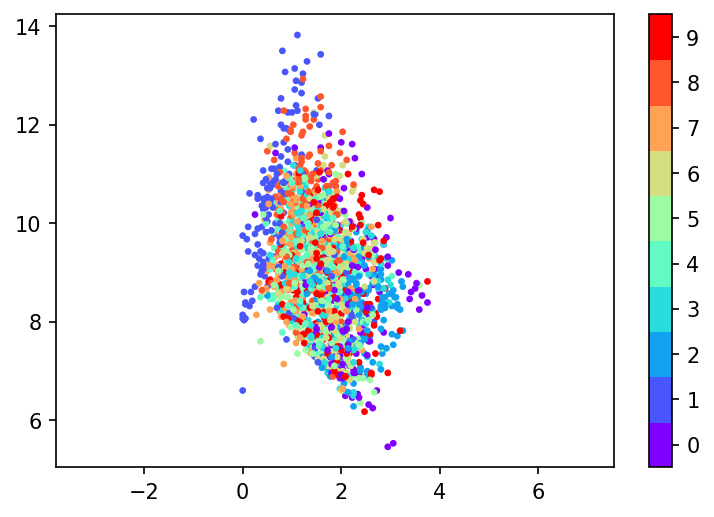

In [148]:
plot_reduced_data(f_emb,digits.target)

In [149]:
svd_emb =  TruncatedSVD(n_components=2).fit_transform(digits.data)


svd_emb.shape

(1797, 2)

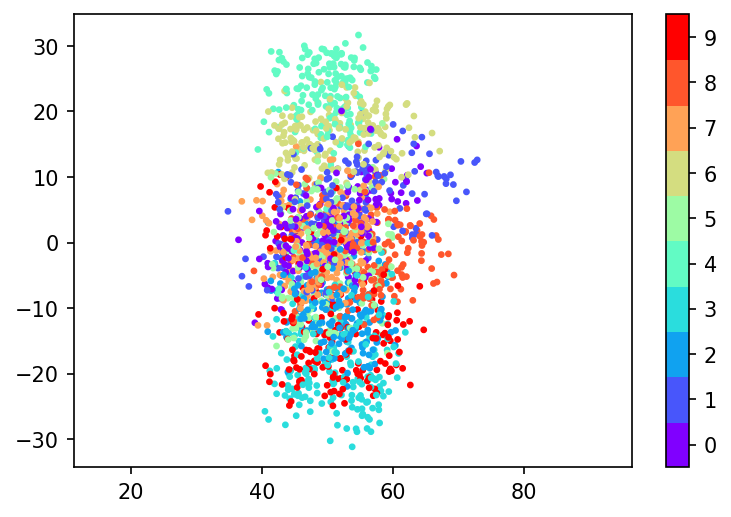

In [150]:
plot_reduced_data(svd_emb,digits.target)

In [151]:
###2

In [152]:
breast_cancer = load_breast_cancer()


breast_cancer.data.shape

(569, 30)

In [154]:
f_emb_brcanc =  FeatureAgglomeration(n_clusters=2).fit_transform(breast_cancer.data)


f_emb_brcanc.shape

(569, 2)

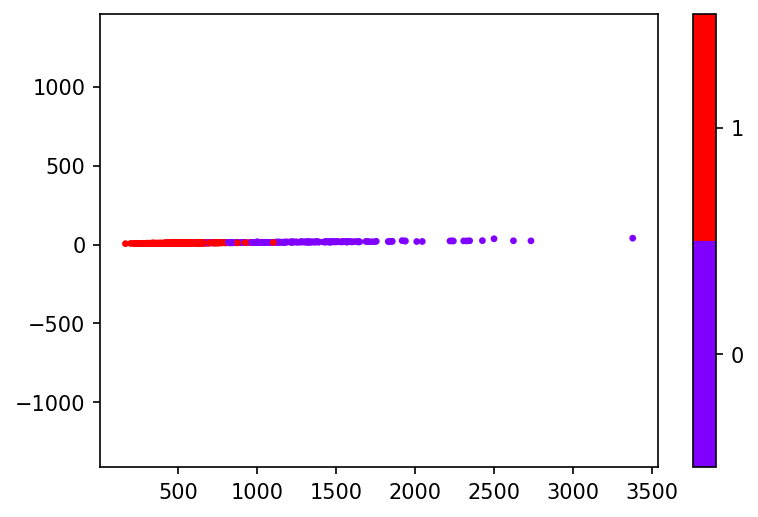

In [155]:
plot_reduced_data(f_emb_brcanc, breast_cancer.target)

In [156]:
svd_emb_brcanc =  TruncatedSVD(n_components=2).fit_transform(breast_cancer.data)
svd_emb_brcanc.shape

(569, 2)

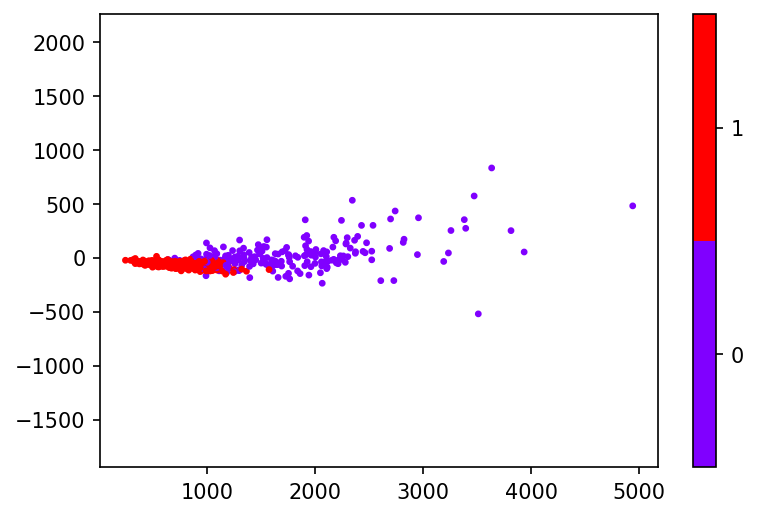

In [157]:
plot_reduced_data(svd_emb_brcanc, breast_cancer.target)

In [158]:
###3

In [159]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(url, names = ['Length_s','Width_s','Length_p','Width_p','species'])

df

,Length_s,Width_s,Length_p,Width_p,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [160]:
df.head()

,Length_s,Width_s,Length_p,Width_p,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [161]:
species = df.species

df = df.drop('species', axis = 1)

df = pd.DataFrame(StandardScaler().fit(df).transform(df))

In [113]:
df

,Length_s,Width_s,Length_p,Width_p
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [136]:
spectral = SpectralClustering(n_clusters=3, random_state=0).fit(df)

spectral.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [137]:
model = umap.UMAP(random_state=42)

umap_emb = model.fit(df).transform(df)

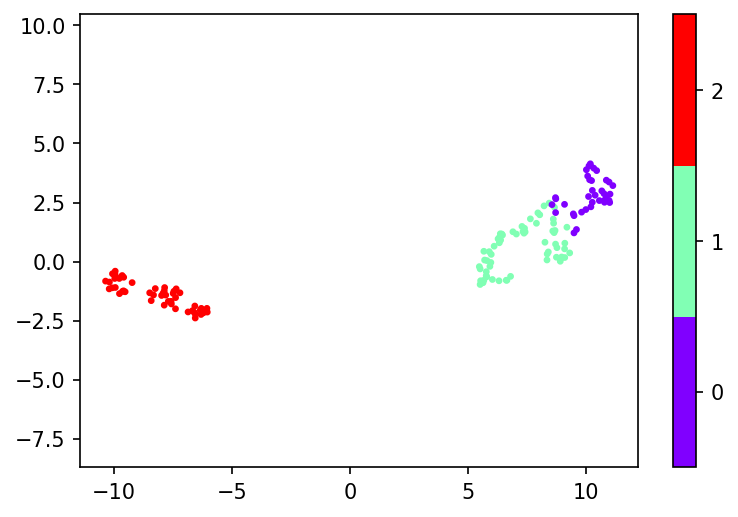

In [139]:
plot_reduced_data(umap_emb,spectral.labels_)